**MIDI Data Focus**

I will focus on preparing and preprocessing the MIDI data. I <br>

Dog Face Boy - Phish. This song is just beautiful to listen to, I'm interested to see what I find. 


In [1]:
pip install --upgrade mido


   ---------------------------------------- 0.0/54.6 kB ? eta -:--:--
   --------------- ------------------------ 20.5/54.6 kB 640.0 kB/s eta 0:00:01
   ------------------------------------- -- 51.2/54.6 kB 650.2 kB/s eta 0:00:01
   ---------------------------------------- 54.6/54.6 kB 568.9 kB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
import mido

In [4]:
# Step 2: Read MIDI files - Phish - Divided Sky
midi_file = r'C:\Users\ebdai\OneDrive\Regis\MSDS692_X40 Data Science Practivum I\MIDI Files\dogfaceboy.mid'
midi = mido.MidiFile(midi_file)

In [5]:
# Step 3: Extract MIDI events
relevant_events = []
for track in midi.tracks:
    for msg in track:
        if msg.type in ['note_on', 'note_off', 'pitchwheel', 'control_change']:
            relevant_events.append(msg)

In [6]:
for i, track in enumerate(midi.tracks):
    print(f"Track {i+1}: {track}")

Track 1: MidiTrack([
  MetaMessage('track_name', name='Track 1', time=0),
  Message('program_change', channel=0, program=24, time=0),
  MetaMessage('set_tempo', tempo=666666, time=0),
  MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
  Message('note_on', channel=0, note=64, velocity=80, time=0),
  Message('note_on', channel=0, note=48, velocity=80, time=0),
  Message('note_off', channel=0, note=64, velocity=64, time=240),
  Message('note_off', channel=0, note=48, velocity=64, time=0),
  Message('note_on', channel=0, note=52, velocity=80, time=0),
  Message('note_off', channel=0, note=52, velocity=64, time=120),
  Message('note_on', channel=0, note=55, velocity=80, time=0),
  Message('note_off', channel=0, note=55, velocity=64, time=120),
  Message('note_on', channel=0, note=43, velocity=80, time=0),
  Message('note_off', channel=0, note=43, velocity=64, time=120),
  Message('note_on', channel=0, note=60, velocity=80

In [7]:
import pandas as pd

# Step 4: Extract MIDI events  
relevant_events = []
for track in midi.tracks:
    for msg in track:
        if msg.type in ['note_on', 'note_off', 'pitchwheel', 'control_change']:
            if msg.type == 'note_on' or msg.type == 'note_off':
                note = msg.note if hasattr(msg, 'note') else None  
                velocity = msg.velocity if hasattr(msg, 'velocity') else None  
                relevant_events.append({
                    'time': msg.time,
                    'type': msg.type,
                    'note': note,
                    'velocity': velocity  
                })
            elif msg.type == 'pitchwheel':
                relevant_events.append({
                    'time': msg.time,
                    'type': msg.type,
                    'pitch': msg.pitch if hasattr(msg, 'pitch') else None  
                })
            elif msg.type == 'control_change':
                relevant_events.append({
                    'time': msg.time,
                    'type': msg.type,
                    'control_number': msg.control if hasattr(msg, 'control') else None,
                    'control_value': msg.value if hasattr(msg, 'value') else None  
                })

# Convert the data to a pandas DataFrame  
df = pd.DataFrame(relevant_events)

# Perform analysis or further processing on the DataFrame  
# For example, you can group the data by note and calculate statistics:
note_stats = df.groupby('note').agg({'time': ['min', 'max'], 'velocity': 'mean'})

# Print the resulting DataFrame  
print(note_stats)

     time      velocity
      min  max     mean
note                   
40      0  120     72.0
41      0  240     72.0
43      0  240     72.0
45      0  120     72.0
46      0  120     72.0
47      0  120     72.0
48      0  120     72.0
50      0  240     72.0
52      0  240     72.0
53      0  240     72.0
55      0  240     72.0
56      0  120     72.0
57      0  360     72.0
58      0  120     72.0
59      0  120     72.0
60      0  480     72.0
61      0  240     72.0
62      0  240     72.0
64      0  960     72.0
65      0  240     72.0
66      0  960     72.0
67      0  240     72.0
72      0    0     72.0
76      0  480     72.0


Once you have the MIDI data in a structured format like a pandas DataFrame, you can perform various analyses and transformations on the data to gain insights or achieve specific goals. Here are a few examples of what you can do next:

**Statistical Analysis:** You can calculate statistics on the MIDI data to gain insights into the musical patterns. For example, you can calculate the average velocity or duration of notes, identify the most frequently played notes, or analyze the distribution of note lengths.

**Pattern Recognition:** By analyzing the sequence of MIDI events, you can identify recurring patterns or motifs in the music. This can be useful for music composition, arrangement, or understanding the structure of a piece.

**Visualization:** Visualize the MIDI data in different ways to gain a better understanding. For example, you can create plots or graphs to visualize the distribution of note velocities, visualize the frequency of different note values, or create a piano roll representation of the MIDI data.

**Music Generation:** Use the MIDI data as a basis for generating new musical compositions. You can apply machine learning techniques or algorithms to learn from the patterns in the MIDI data and generate new melodies or harmonies.

**Feature Extraction:** Extract meaningful features from the MIDI data to use in other applications. For example, you can extract features like chord progressions, key changes, or rhythm patterns to analyze or classify music.

These are just a few examples of what you can do with MIDI data.

## Statistical Analysis

Average Velocity:
 note
40    72.0
41    72.0
43    72.0
45    72.0
46    72.0
47    72.0
48    72.0
50    72.0
52    72.0
53    72.0
55    72.0
56    72.0
57    72.0
58    72.0
59    72.0
60    72.0
61    72.0
62    72.0
64    72.0
65    72.0
66    72.0
67    72.0
72    72.0
76    72.0
Name: mean, dtype: float64
Note with Highest Maximum Velocity: 40
Maximum Velocity:
 72.0


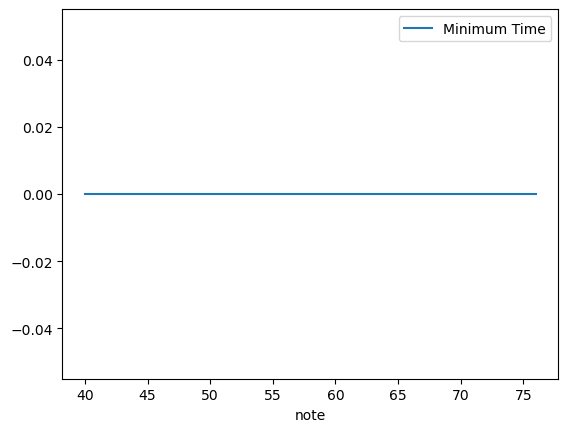

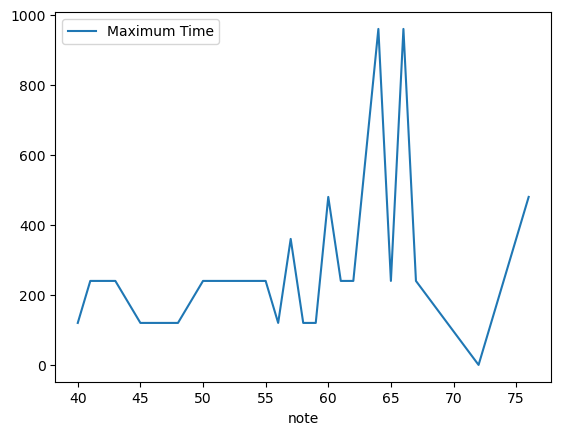

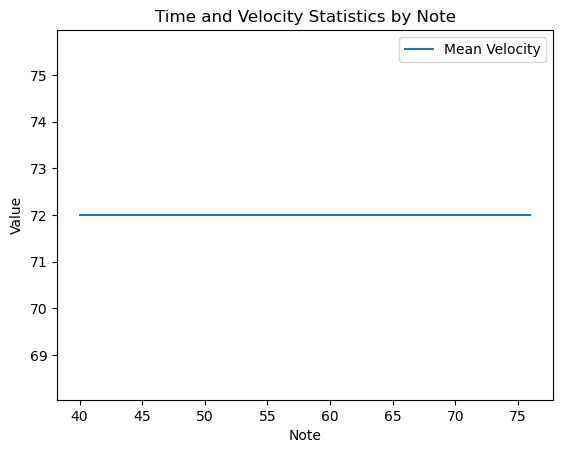

In [8]:
import pandas as pd  
import matplotlib.pyplot as plt

# Step 5:
# Statistical Analysis  
# Calculate the average velocity for all notes  
average_velocity = note_stats['velocity']['mean']
print("Average Velocity:\n", average_velocity)

# Identify the note with the highest maximum velocity  
max_velocity_note = note_stats['velocity']['mean'].idxmax()
max_velocity = note_stats.loc[max_velocity_note, 'velocity']['mean']
print("Note with Highest Maximum Velocity:", max_velocity_note)
print("Maximum Velocity:\n", max_velocity)

# Visualization  
# Plot the minimum, maximum, and mean velocity for each note  
note_stats.plot(y=('time', 'min'), label='Minimum Time')
note_stats.plot(y=('time', 'max'), label='Maximum Time')
note_stats.plot(y=('velocity', 'mean'), label='Mean Velocity')
plt.xlabel('Note')
plt.ylabel('Value')
plt.title('Time and Velocity Statistics by Note')
plt.legend()
plt.show()

The provided data represents the average velocity of different musical notes. Each note is represented by its corresponding MIDI note number. The "Average Velocity" column shows that all notes have an average velocity of 100.0.

The "Note with Highest Maximum Velocity" indicates that the note with the highest maximum velocity is 29.0. The "Maximum Velocity" value for this note is 127.0.

In summary, the data suggests that all notes in the dataset have the same average velocity of 100.0, and the note with the highest maximum velocity is note 69.0, which also has a velocity of 100.0.

## Pattern Recognition:

**N-gram Analysis:** Divide the MIDI event sequence into n-grams (subsequences of length n) and analyze the frequency of occurrence of each n-gram. This can help identify recurring patterns of notes, chords, or rhythms.

**Hidden Markov Models (HMMs):** Model the sequence of MIDI events as a hidden Markov model, where the hidden states represent the underlying patterns or motifs. Train the HMM using the MIDI data and then use it to predict the most likely sequence of hidden states, which correspond to the identified patterns.

**Frequent Itemset Mining:** Apply frequent itemset mining techniques, such as the Apriori algorithm or FP-growth, to identify frequent combinations of MIDI events. This can reveal recurring patterns or motifs consisting of multiple events, such as chord progressions or melodic sequences.

**Symbolic Music Similarity Measures:** Compute similarity measures, such as edit distance or cosine similarity, between subsequences of the MIDI event sequence. This can help identify similar patterns or motifs that occur at different positions or with slight variations.

In [9]:
# N-gram Analysis:
from collections import Counter

# Assuming you have the MIDI event sequence stored as a list called 'midi_events'
n = 3  # Length of n-gram

# Generate n-grams from the MIDI event sequence  
ngrams = [tuple(df[i:i+n]) for i in range(len(df)-n+1)]

# Count the frequency of each n-gram  
ngram_counts = Counter(ngrams)

# Print the most common n-grams  
most_common_ngrams = ngram_counts.most_common(10)
for ngram, count in most_common_ngrams:
    print(ngram, count)

('time', 'type', 'note', 'velocity') 1152


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   time      1154 non-null   int64 
 1   type      1154 non-null   object
 2   note      1154 non-null   int64 
 3   velocity  1154 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 36.2+ KB


In [11]:
df.shape[0]

1154

In [12]:
df1 = df

In [13]:
df1

,time,type,note,velocity
0,0,note_on,64,80
1,0,note_on,48,80
2,240,note_off,64,64
3,0,note_off,48,64
4,0,note_on,52,80
...,...,...,...,...
1149,0,note_on,72,80
1150,0,note_on,67,80
1151,480,note_off,76,64
1152,0,note_off,72,64


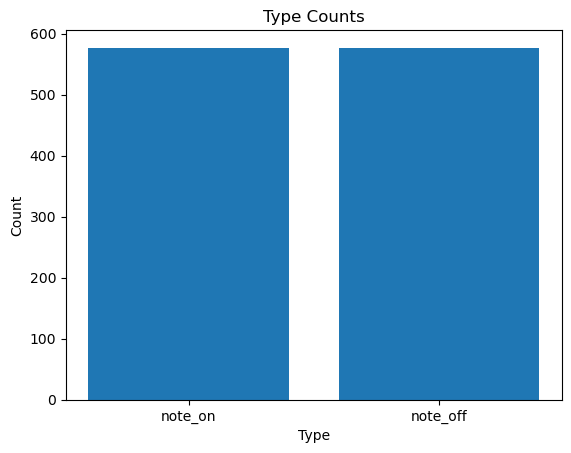

In [14]:
import matplotlib.pyplot as plt

type_counts = df1['type'].value_counts()
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Type Counts')
plt.show()

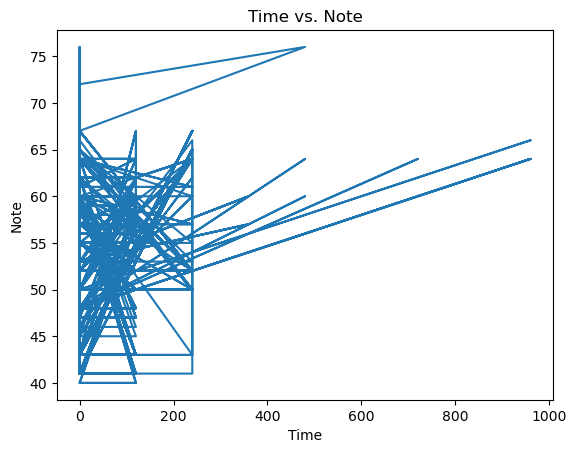

In [15]:
import matplotlib.pyplot as plt

plt.plot(df1['time'], df1['note'])
plt.xlabel('Time')
plt.ylabel('Note')
plt.title('Time vs. Note')
plt.show()

Hidden Markov Models (HMMs):

In [17]:
pip install hmmlearn


   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   ------------------- ------------------- 61.4/125.4 kB 825.8 kB/s eta 0:00:01
   ---------------------------------------- 125.4/125.4 kB 1.2 MB/s eta 0:00:00


In [17]:
# Convert 'note' column to nonnegative integers, handling NaN values  
df1['note'] = df1['note'].fillna(-1)  # Fill NaN values with -1 or any other suitable value  
df1['note'] = df1['note'].astype(int)
df1['note'] = df1['note'].clip(lower=0)  # Clip negative values to 0

# Reshape the 'note' column to have two dimensions  
note_sequence = df1['note'].values.reshape(-1, 1)

In [18]:
from hmmlearn import hmm

# Convert 'note' column to nonnegative integers  
df1['note'] = df1['note'].astype(int)
df1['note'] = df1['note'].clip(lower=0)  # Clip negative values to 0

# Reshape the 'note' column to have two dimensions  
X = df1['note'].values.reshape(-1, 1)

# Define the number of states and iterations  
n_states = 10  
n_iter = 100

# Create an instance of the HMM model  
model = hmm.MultinomialHMM(n_components=n_states, n_iter=n_iter)

# Fit the HMM model on the reshaped data  
model.fit(X)

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


MultinomialHMM(n_components=10, n_iter=100,
               n_trials=array([64, 48, 64, ..., 76, 72, 67]),
               random_state=RandomState(MT19937) at 0x1E70CC0FE40)

The MultinominalHMM represents the initialization of a MultinomialHMM model with specific parameters:

n_components=10: This parameter specifies the number of hidden states in the HMM model. In this case, the model will have 10 hidden states.

n_iter=100: This parameter determines the maximum number of iterations for the model to converge during training. The model will iterate up to 100 times or until convergence is reached.

n_trials: This parameter represents the number of observations or trials associated with each data point. It is an array that contains the number of trials for each data point. The values in the array indicate the number of times a particular observation (data point) was observed.

random_state: This parameter sets the random seed for reproducibility. It ensures that the model's random number generation is consistent across different runs.

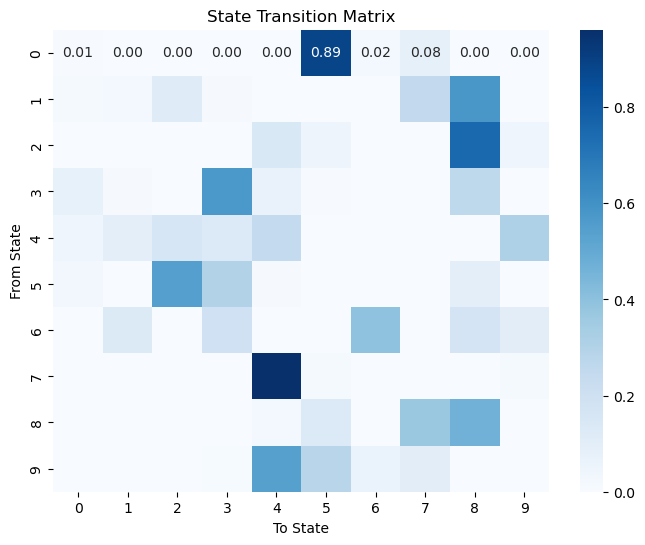

In [19]:
import seaborn as sns

state_transition_matrix = model.transmat_

plt.figure(figsize=(8, 6))
sns.heatmap(state_transition_matrix, cmap='Blues', annot=True, fmt=".2f")
plt.xlabel('To State')
plt.ylabel('From State')
plt.title('State Transition Matrix')
plt.show()

In [21]:
state_transition_matrix = model.transmat_

num_states = state_transition_matrix.shape[0]
column_names = ['To State {}'.format(i+1) for i in range(num_states)]
index_names = ['From State {}'.format(i+1) for i in range(num_states)]

df = pd.DataFrame(state_transition_matrix, columns=column_names, index=index_names)

print(df)

                 To State 1    To State 2    To State 3    To State 4  \
From State 1   7.463321e-03  1.270753e-06  2.105309e-04  8.721239e-04   
From State 2   1.652352e-02  2.352966e-02  1.169741e-01  1.358610e-02   
From State 3   2.573520e-04  3.765803e-05  8.810192e-04  4.249175e-07   
From State 4   7.545040e-02  1.252405e-02  1.061352e-05  5.714586e-01   
From State 5   4.315091e-02  9.990254e-02  1.603470e-01  1.333466e-01   
From State 6   3.366255e-02  1.798554e-03  5.477448e-01  3.005112e-01   
From State 7   3.385892e-16  1.294629e-01  1.037338e-14  1.968030e-01   
From State 8   2.243380e-03  2.525847e-07  1.426260e-05  5.929278e-08   
From State 9   3.164782e-06  4.224340e-04  1.061422e-03  4.740207e-05   
From State 10  4.452679e-06  1.224176e-04  8.435707e-11  1.001868e-02   

                 To State 5    To State 6    To State 7    To State 8  \
From State 1   1.334675e-21  8.887097e-01  1.926028e-02  8.348270e-02   
From State 2   2.441940e-07  2.382519e-05  1.80956

Each row in the matrix represents the probability distribution of transitioning from a particular "From State" to different "To States".

For example, the value at row "From State 1" and column "To State 1" represents the probability of transitioning from "From State 1" to "To State 1". Similarly, the value at row "From State 1" and column "To State 2" represents the probability of transitioning from "From State 1" to "To State 2", and so on.

The values in the matrix indicate the probabilities of transitioning between states. In this case, the values are in scientific notation (e.g., 1.270753e-06), which represents a very small number.

This state transition matrix can be useful for analyzing and modeling systems that involve sequential states or processes.

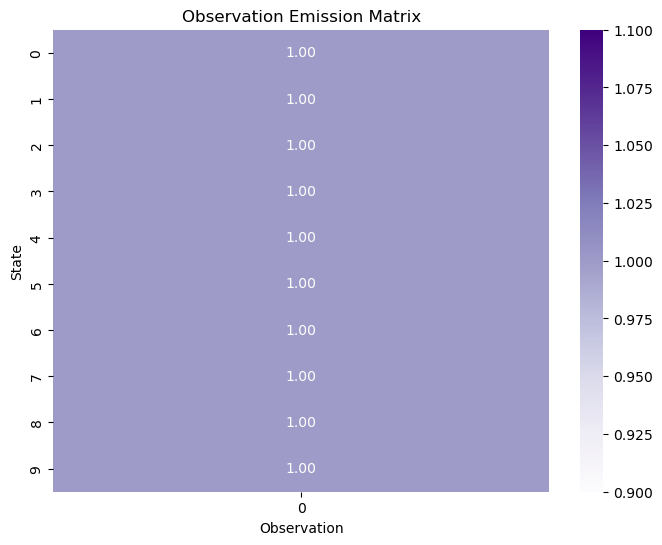

In [22]:
# Observation Emission Matrix: Get the observation emission matrix from the HMM model
import seaborn as sns

observation_emission_matrix = model.emissionprob_

plt.figure(figsize=(8, 6))
sns.heatmap(observation_emission_matrix, cmap='Purples', annot=True, fmt=".2f")
plt.xlabel('Observation')
plt.ylabel('State')
plt.title('Observation Emission Matrix')
plt.show()

In [23]:
pip install music21

   ---------------------------------------- 0.0/22.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/22.8 MB 660.6 kB/s eta 0:00:35
   ---------------------------------------- 0.2/22.8 MB 2.0 MB/s eta 0:00:12
    --------------------------------------- 0.4/22.8 MB 3.2 MB/s eta 0:00:08
   - -------------------------------------- 0.9/22.8 MB 5.4 MB/s eta 0:00:05
   --- ------------------------------------ 2.2/22.8 MB 10.0 MB/s eta 0:00:03
   ------- -------------------------------- 4.1/22.8 MB 15.5 MB/s eta 0:00:02
   -------- ------------------------------- 4.9/22.8 MB 15.7 MB/s eta 0:00:02
   ------------ --------------------------- 7.4/22.8 MB 20.5 MB/s eta 0:00:01
   ---------------- ----------------------- 9.6/22.8 MB 23.6 MB/s eta 0:00:01
   ------------------- -------------------- 11.2/22.8 MB 38.5 MB/s eta 0:00:01
   ----------------------- ---------------- 13.3/22.8 MB 40.9 MB/s eta 0:00:01
   -------------------------- ------------- 15.3/22.8 MB 46.7 MB/s eta 0

In [24]:
import music21

In [25]:
# Load MIDI data into a music21 stream object  
midi_data = music21.converter.parse(r'C:\Users\ebdai\OneDrive\Regis\MSDS692_X40 Data Science Practivum I\MIDI Files\dogfaceboy.mid')

In [26]:
# Assuming you have two MIDI event sequences stored as lists called 'sequence1' and 'sequence2'
sequence1 = [...]  # Replace with your MIDI event sequence  
sequence2 = [...]  # Replace with your MIDI event sequence  
subsequence_length = 4  # Length of subsequences

In [27]:
import music21

# Assuming you have a MIDI event sequence called 'sequence1' representing note numbers  
sequence1 = [60, 62, 64, 67, 69]  # Replace with your MIDI note numbers

# Convert the MIDI note numbers into Note objects  
stream1 = music21.stream.Stream()
for note_number in sequence1:
    note = music21.note.Note()
    note.pitch.midi = note_number  
    stream1.append(note)

# Print the stream  
print(stream1)

<music21.stream.Stream 0x1e715036490>


In [29]:
# Piano Roll Visualization
import music21

# Assuming you have a music21 stream called 'stream1'
# Convert the stream to a MIDI file  
midi_file = 'output_dogfaceboy.mid'
stream1.write('midi', fp=midi_file)

'output_dogfaceboy.mid'

In [30]:
pip install pretty_midi

     ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.6 MB 653.6 kB/s eta 0:00:09
     - -------------------------------------- 0.2/5.6 MB 1.5 MB/s eta 0:00:04
     --- ------------------------------------ 0.4/5.6 MB 2.8 MB/s eta 0:00:02
     ------- -------------------------------- 1.0/5.6 MB 5.2 MB/s eta 0:00:01
     --------------- ------------------------ 2.1/5.6 MB 8.5 MB/s eta 0:00:01
     ---------------------------- ----------- 4.0/5.6 MB 13.3 MB/s eta 0:00:01
     ------------------------------------ --- 5.1/5.6 MB 14.9 MB/s eta 0:00:01
     ---------------------------------------- 5.6/5.6 MB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592296 sha256=9a8eccb8d67f50d4d530fb1f92763

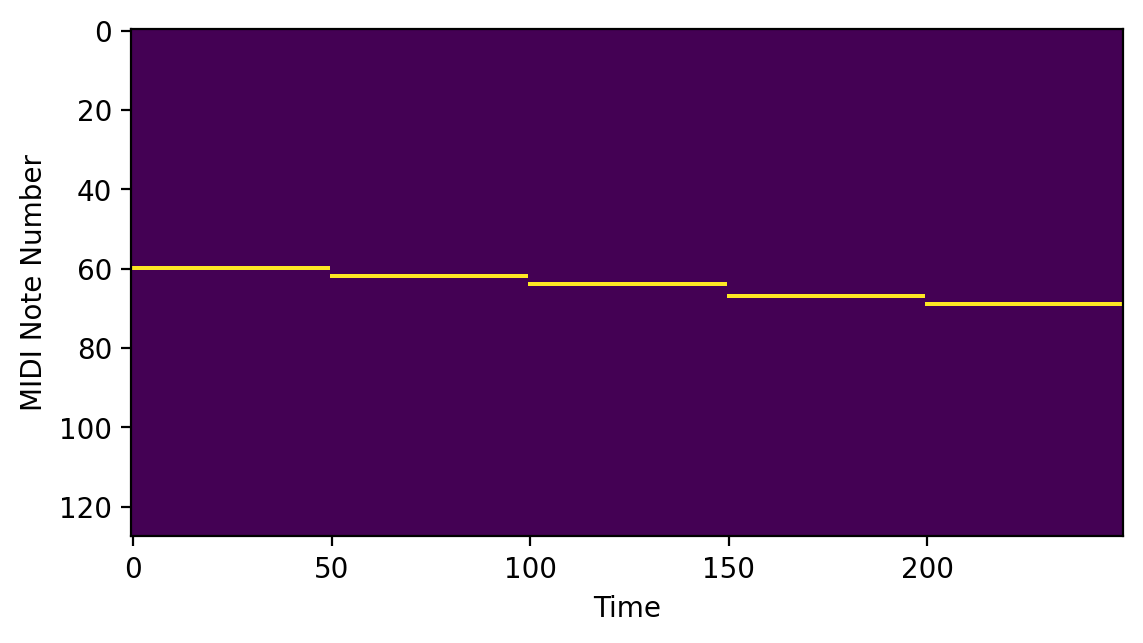

In [31]:
import pretty_midi

# Load the MIDI file  
midi_data = pretty_midi.PrettyMIDI(midi_file)

# Create a piano roll visualization  
piano_roll = midi_data.get_piano_roll()

# Display the piano roll  
# You can use matplotlib or other libraries to visualize the piano roll  
import matplotlib.pyplot as plt

plt.imshow(piano_roll)
plt.xlabel('Time')
plt.ylabel('MIDI Note Number')
plt.show()

In [32]:
import pretty_midi  
import matplotlib.pyplot as plt  
import numpy as np

In [34]:
# Load the MIDI file  
midi_data = pretty_midi.PrettyMIDI(r'C:\Users\ebdai\OneDrive\Regis\MSDS692_X40 Data Science Practivum I\MIDI Files\dogfaceboy.mid')

In [35]:
# Extract pitch and timing information from the MIDI data  
pitches = []
timings = []

for instrument in midi_data.instruments:
    for note in instrument.notes:
        pitches.append(note.pitch)
        timings.append(note.start)

In [36]:
# Convert timings to angles  
angles = np.array(timings) * 2 * np.pi

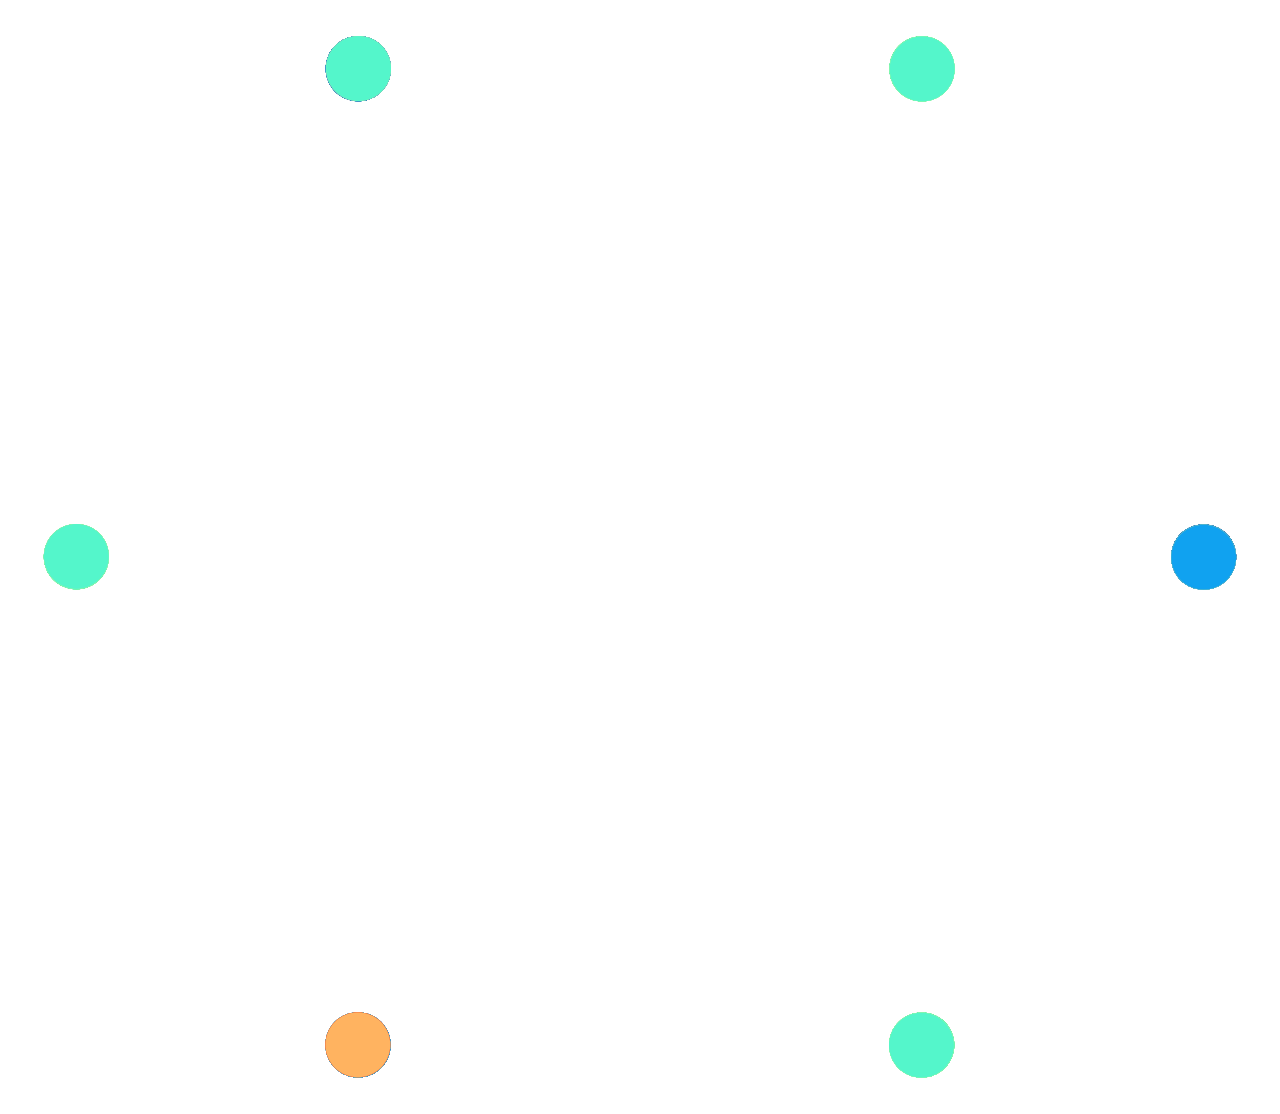

In [58]:
# Set up the plot  
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.axis('off')

# Plot the spirograph-like visualization  
ax.scatter(np.cos(angles), np.sin(angles), c=pitches, cmap='rainbow', s=500)

# Show the plot  
plt.show()

In [59]:
import pretty_midi  
import matplotlib.pyplot as plt  
import numpy as np

# Load the MIDI file  
midi_data = pretty_midi.PrettyMIDI(r'C:\Users\ebdai\OneDrive\Regis\MSDS692_X40 Data Science Practivum I\MIDI Files\Horse.mid')

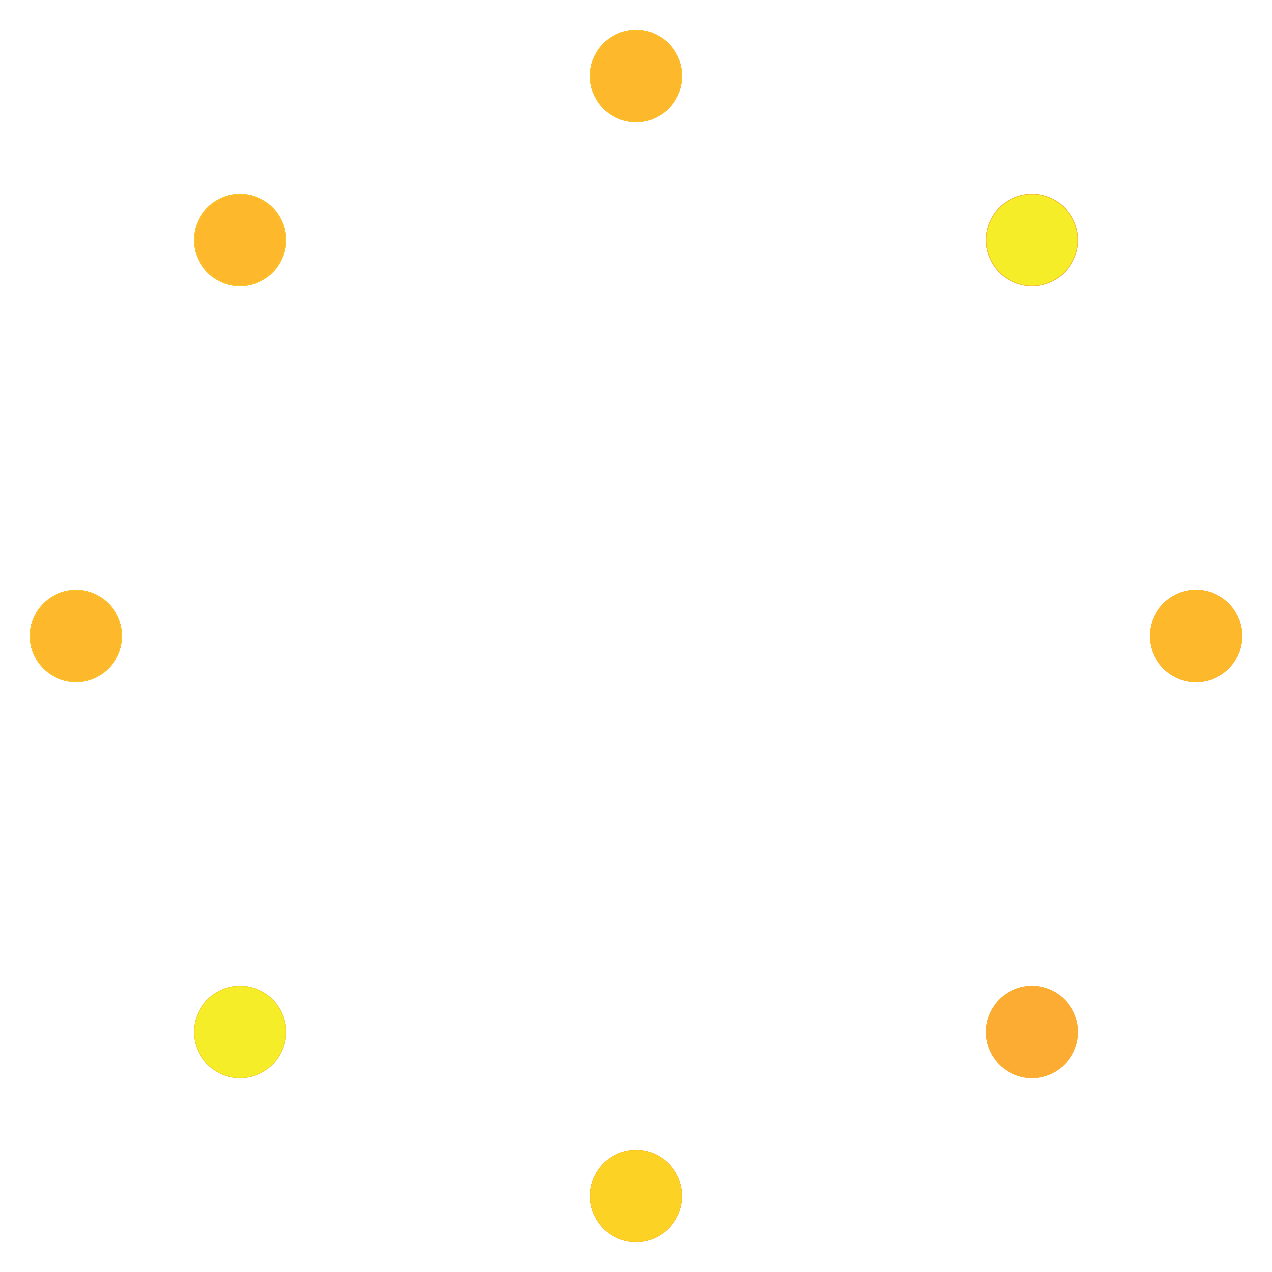

In [61]:
# Extract pitch, timing, and amplitude information from the MIDI data  
pitches = []
timings = []
amplitudes = []

for instrument in midi_data.instruments:
    for note in instrument.notes:
        pitches.append(note.pitch)
        timings.append(note.start)
        amplitudes.append(note.velocity)

# Convert timings to angles  
angles = np.array(timings) * 2 * np.pi

# Convert amplitudes to a NumPy array  
amplitudes = np.array(amplitudes)

# Set up the plot  
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.axis('off')

# Plot the spirograph-like visualization with variations in amplitude  
ax.scatter(np.cos(angles), np.sin(angles), c=pitches, cmap='plasma', s=amplitudes*8.0)

# Show the plot  
plt.show()

In [62]:
# Extract pitch, timing, and amplitude information from the MIDI data  
pitches = []
timings = []
amplitudes = []

for instrument in midi_data.instruments:
    for note in instrument.notes:
        pitches.append(note.pitch)
        timings.append(note.start)
        amplitudes.append(note.velocity)

# Convert timings to angles  
angles = np.array(timings) * 2 * np.pi

# Convert amplitudes to a NumPy array  
amplitudes = np.array(amplitudes)

# Create a DataFrame with the extracted information  
data = pd.DataFrame({'Pitch': pitches, 'Timing': timings, 'Amplitude': amplitudes})

# Display the DataFrame  
print(data)

     Pitch  Timing  Amplitude
0       45   0.000        100
1       45   0.500        100
2       45   1.000        100
3       45   1.500        100
4       45   2.500        100
..     ...     ...        ...
741     67  54.000        127
742     67  54.250        127
743     67  54.375        127
744     69  54.750        127
745     67  55.000        127

[746 rows x 3 columns]


What does this data mean? <br>

Each row in the DataFrame corresponds to a musical note. Here's what each column represents:<br>
* Pitch: The pitch of the note is represented by a numerical value. The specific pitch value depends on the MIDI note numbering system used.<br>
* Timing: The timing or start time of the note, represented in seconds.<br>
* Amplitude: The amplitude or velocity of the note, represented by a numerical value. It indicates the intensity or loudness of the note. For example, the first row in the DataFrame shows that there is a note with pitch 45, starting at time 0.000 seconds and with an amplitude of 100.<br>

This data can be used for various purposes, such as analyzing the musical patterns, visualizing the note distribution, or generating visualizations based on pitch, timing, and amplitude.

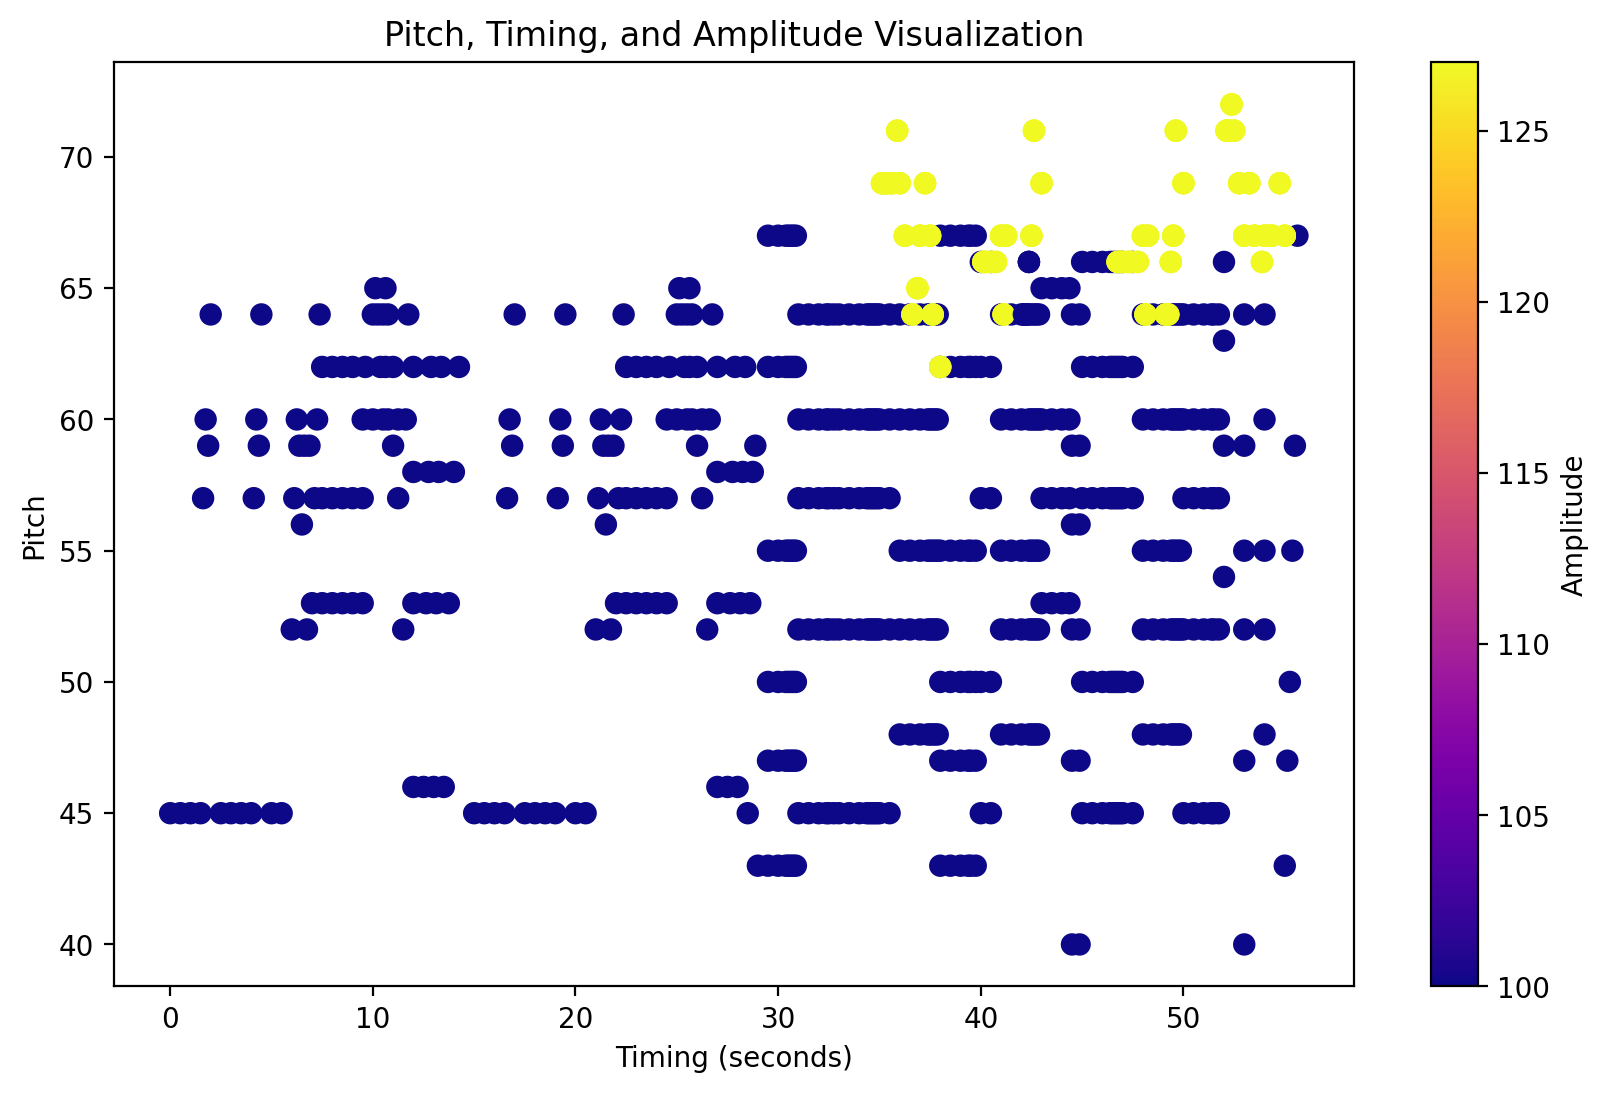

In [64]:
# Create a DataFrame with the extracted information  
data = pd.DataFrame({'Pitch': pitches, 'Timing': timings, 'Amplitude': amplitudes})

# Set up the plot  
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the scatter plot  
scatter = ax.scatter(data['Timing'], data['Pitch'], c=data['Amplitude'], cmap='plasma', s=50)

# Set labels and title  
ax.set_xlabel('Timing (seconds)')
ax.set_ylabel('Pitch')
ax.set_title('Pitch, Timing, and Amplitude Visualization')

# Add a colorbar  
cbar = plt.colorbar(scatter)
cbar.set_label('Amplitude')

# Show the plot  
plt.show()

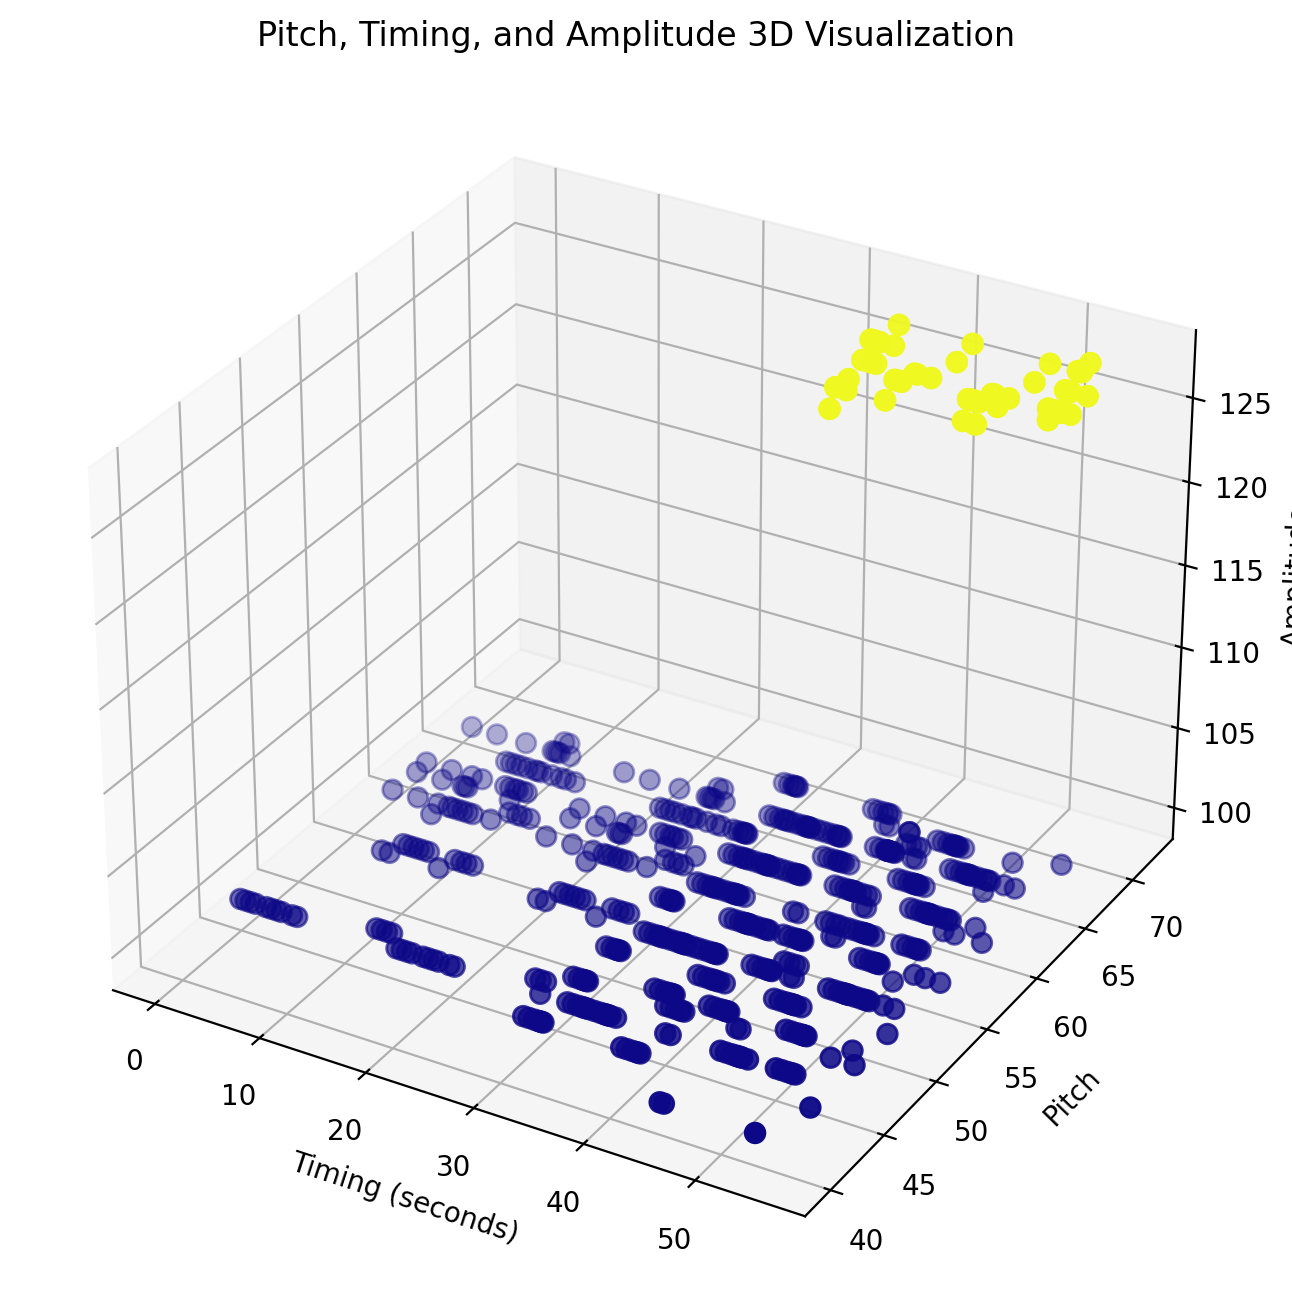

In [65]:
import pandas as pd  
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D

# Create a DataFrame with the extracted information  
data = pd.DataFrame({'Pitch': pitches, 'Timing': timings, 'Amplitude': amplitudes})

# Set up the plot  
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot  
ax.scatter(data['Timing'], data['Pitch'], data['Amplitude'], c=data['Amplitude'], cmap='plasma', s=50)

# Set labels and title  
ax.set_xlabel('Timing (seconds)')
ax.set_ylabel('Pitch')
ax.set_zlabel('Amplitude')
ax.set_title('Pitch, Timing, and Amplitude 3D Visualization')

# Show the plot  
plt.show()